In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('employee-turnover-balanced.csv')
df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   left_company                   1000 non-null   object
 1   age                            1000 non-null   int64 
 2   frequency_of_travel            1000 non-null   object
 3   department                     1000 non-null   object
 4   commuting_distance             1000 non-null   int64 
 5   education                      1000 non-null   int64 
 6   satisfaction_with_environment  1000 non-null   int64 
 7   gender                         1000 non-null   object
 8   seniority_level                1000 non-null   int64 
 9   position                       1000 non-null   object
 10  satisfaction_with_job          1000 non-null   int64 
 11  married_or_single              1000 non-null   object
 12  last_raise_pct                 1000 non-null   int64 
 13  last

<AxesSubplot:>

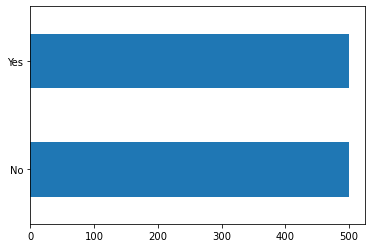

In [3]:
df['left_company'].value_counts().plot.barh()

#### Splitting into training and test sets

In [4]:
df['left_company']=df.left_company .replace({'No': 0, 'Yes': 1})

In [5]:
from sklearn.model_selection import train_test_split
targetCol = 'left_company'
featureCols = [x for x in df.columns if x != targetCol]

y = df[targetCol]
X = df[featureCols]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

print(f'Target: {targetCol}')
print('Features:')
print(*featureCols, sep=',\t')
print('\n')
print(f'Training examples: {x_train.shape[0]:,}')
print(f'Test examples: {x_test.shape[0]:,}')

Target: left_company
Features:
age,	frequency_of_travel,	department,	commuting_distance,	education,	satisfaction_with_environment,	gender,	seniority_level,	position,	satisfaction_with_job,	married_or_single,	last_raise_pct,	last_performance_rating,	total_years_working,	years_at_company,	years_in_current_job,	years_since_last_promotion,	years_with_current_supervisor


Training examples: 800
Test examples: 200


# Question 1
- Set-up a feature processing pipeline using the training data.  
- While the data doesn't contain missing values, assume the test data could.  
- Use the below lists to split the features that should be treated as numerical and categorical variables.  
- I would recommend printing out verification output to verify the pipeline transforms the data as expected.

In [6]:
numericalFeatures = ['age', 'commuting_distance', 'last_raise_pct', 'total_years_working', 'years_at_company',
                    'years_in_current_job', 'years_since_last_promotion', 'years_with_current_supervisor']

categoricalFeatures = ['frequency_of_travel', 'department', 'education', 'satisfaction_with_environment',
                       'gender', 'seniority_level', 'position', 'satisfaction_with_job', 'married_or_single',
                      'last_performance_rating']


In [7]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [8]:
num_pip = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('stand_num', StandardScaler())
                        ])

cat_pip = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('cat_dummies', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pip = ColumnTransformer(transformers=[('num', num_pip, numericalFeatures),
                                                      ('cat', cat_pip, categoricalFeatures)])



# Question 2
- Using cross-validation evaluate a logistic regression model, evaluate three (4) different regularization strengths with `l2`, with one model containing no regularization.  
- Which regularization strength would be ideal for logistic regression?
- Use as much code as you need to defend your opinion.  
- Comment on your rationale for your choice.

In [9]:
# insert code here

from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
#logistic regression without regularization

modeling_pipeline = Pipeline([
        ('data_processing', processing_pip),
        ('model', LogisticRegression())]
    )
modeling_pipeline

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stand_num',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                

In [10]:
# ignoring the warnings 
import warnings
warnings.filterwarnings("ignore")

In [11]:
# evaluating logistic regression without regularization using cross validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(modeling_pipeline, x_train, y_train, 
                            scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5)
cv_results

{'fit_time': array([0.04963207, 0.07454109, 0.04273272, 0.03292513, 0.03168321]),
 'score_time': array([0.00984907, 0.00797176, 0.00783205, 0.00830078, 0.00776911]),
 'test_accuracy': array([0.74375, 0.70625, 0.71875, 0.6875 , 0.68125]),
 'test_recall': array([0.72839506, 0.7125    , 0.725     , 0.775     , 0.65      ]),
 'test_precision': array([0.75641026, 0.7037037 , 0.71604938, 0.65957447, 0.69333333]),
 'test_f1_macro': array([0.74373999, 0.70623852, 0.71873901, 0.68508896, 0.68093842]),
 'test_roc_auc': array([0.83513049, 0.79515625, 0.7915625 , 0.7490625 , 0.749375  ])}

This results shows without regularization, models performace is fair with max accuracy of 0.74

In [12]:
#logistic regression without l2 regularization

def generate_estimates(c):

    num_pip = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('stand_num', StandardScaler())
                        ])

    cat_pip = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('cat_dummies', OneHotEncoder(handle_unknown='ignore', drop='first'))])
    
    processing_pip =ColumnTransformer(transformers=[('num', num_pip, numericalFeatures),
                                                      ('cat', cat_pip, categoricalFeatures)])
    
    modeling_pipeline = Pipeline([('data_processing', processing_pip),
        ('logreg', LogisticRegression(penalty='l2', C=c))]
    )

    return modeling_pipeline.fit(x_train, y_train)

lr_data = defaultdict(dict)

cvals = [ 0.001, 0.1, 10.0]
for cv in cvals:
    m = generate_estimates(c=cv)
    
    cv_results = cross_validate(m, x_train, y_train, 
                            scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5)
    print(cv_results)
    print('.........................................................')


{'fit_time': array([0.01206899, 0.01117682, 0.01108813, 0.01253986, 0.01234603]), 'score_time': array([0.00862908, 0.0081501 , 0.00754476, 0.00780487, 0.00763011]), 'test_accuracy': array([0.69375, 0.6    , 0.60625, 0.61875, 0.55625]), 'test_recall': array([0.69135802, 0.7125    , 0.675     , 0.6875    , 0.6       ]), 'test_precision': array([0.7       , 0.58163265, 0.59340659, 0.6043956 , 0.55172414]), 'test_f1_macro': array([0.69373804, 0.59487261, 0.60438008, 0.61693944, 0.55539901]), 'test_roc_auc': array([0.75683701, 0.71078125, 0.70875   , 0.66671875, 0.60890625])}
.........................................................
{'fit_time': array([0.01726103, 0.01851583, 0.02006817, 0.02016807, 0.01918888]), 'score_time': array([0.00750494, 0.00746918, 0.00786781, 0.0073719 , 0.00806618]), 'test_accuracy': array([0.75625, 0.7375 , 0.7375 , 0.69375, 0.6625 ]), 'test_recall': array([0.77777778, 0.7625    , 0.75      , 0.775     , 0.625     ]), 'test_precision': array([0.75      , 0.72619

From the given c values models performance looks better at 0.1 value. To analyze more clearly lets plot validation curve so that we can plot the range of accuracies we observe for many folds.

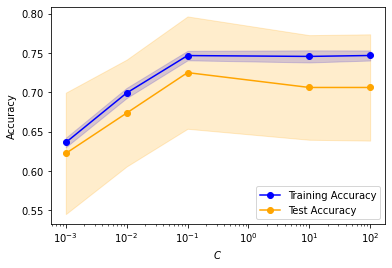

In [13]:
from sklearn.model_selection import validation_curve

modeling_pipeline = Pipeline([('data_processing', processing_pip),
        ('logreg', LogisticRegression(penalty='l2'))])

param_range = [0.001,0.01, 0.1, 10.0,100]

training_scores, test_scores = validation_curve(estimator=modeling_pipeline, X=x_train, y=y_train,
                                               param_name='logreg__C', 
                                               param_range=param_range,scoring='accuracy',n_jobs=1, cv=15)

train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', label='Training Accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2, color='blue')

plt.plot(param_range, test_mean, color='orange', marker='o', label='Test Accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2, color='orange')

plt.xscale('log')
plt.xlabel('$C$')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

For the hyperparameters C we have used (0.001,0.01, 0.1, 10.0,100) values. Graph shows that accuracy is increasing till the C=0.1 and then it starts slightly declining. Which shows the 0.1 regularization strength would be ideal for logistic regression. Graph also shows that training acurracy is higher than test may be we need more number of samples to avoid overfitting.

# Question 3
- Using cross-validation, evaluate a decision tree. Consider at least 3 different `max_depth` and 3 different `min_samples_split`. Use a fraction for the `min_samples_split`.  
- Which combination seems to be the ideal for the decision tree? Use performance from the cross-validation and test sets to defend your opinion.  
- Use as much code a you need to defend your opinion.  
- Comment on your rationale for your choice.

In [14]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

modeling_pipeline = Pipeline([
    ('data_processing', processing_pip),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [2, 5, 10, 15, 20],
   'dt__min_samples_split':[0.1,0.2,0.3,0.5,0.4,0.6,0.7,0.8,0.9]}]



Was not sure about what fractional values should be given so gave 0.1 to 0.9. Lets see which value is selected for min_samples_split

In [15]:
gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, refit=True)
gcv_results = gcv_results.fit(x_train, y_train)

gcv_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stand_num',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                

In [16]:
y_testp = gcv_results.predict(x_test)
y_testp_dt = gcv_results.predict_proba(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       101
           1       0.66      0.72      0.69        99

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200



According to the GridSearchCV's cross_val_score to measure the prediction performance of the better performing hyperparameters max_depth is 15 and min_samples_split is 0.1. Which gives the accuracy score of 0.69.

# Question 4
- Compare the best logistic regression and best decision tree and decide which is superior.  
- Use as much code as you need to defend your opinion. Use performance from the cross-validation and test sets to defend your opinion.  
- Comment on your rationale for your choice.

In [17]:
# insert code here
from sklearn.model_selection import GridSearchCV

modeling_pipeline_lr = Pipeline([
    ('data_processing', processing_pip),
    ('logreg', LogisticRegression(penalty='l2'))]
)

param_grid = [
  {'logreg__class_weight': [None, 'balanced'], 'logreg__C':[0.1]}
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline_lr, 
                           param_grid=param_grid, refit=True, cv=15)
gcv_results = gcv_results.fit(x_train, y_train)

gcv_results.best_estimator_


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stand_num',
                                                                   StandardScaler())]),
                                                  ['age', 'commuting_distance',
                                                   'last_raise_pct',
                                                   'total_years_working',
                                                   'years_at_company',
                                                   'years_in_current_job',
                                                   'years_since_last_promotion',
                                                   'years_with_current_supervisor']),
                

In [18]:
y_testp = gcv_results.predict(x_test)
y_testpr_lr = gcv_results.predict_proba(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       101
           1       0.74      0.79      0.76        99

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.75       200



In [19]:
modeling_pipeline_dt = Pipeline([
    ('data_processing', processing_pip),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [{'dt__max_depth': [10],
   'dt__min_samples_split':[0.1]
   }]
  
gcv_results = GridSearchCV(estimator=modeling_pipeline_dt, 
                           param_grid=param_grid, refit=True)
gcv_results = gcv_results.fit(x_train, y_train)

y_testp = gcv_results.predict(x_test)
y_testp_dt = gcv_results.predict_proba(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67       101
           1       0.66      0.77      0.71        99

    accuracy                           0.69       200
   macro avg       0.70      0.69      0.69       200
weighted avg       0.70      0.69      0.69       200



Considering both models classification_report logistic regression with 0.1 strenght is better performing. It has high accuracy score. Also for decision tree recall value for False_class is low with the given hyperparameters. May be we need to try integer value for min_samples_split parameter. 

In [ ]:
roc curve , accuracy 